# Machine Learning 3 & Constraint Satisfaction Problems

---

_Authors: Dhavide Aruliah_ and _Jacob Koehler_

### Assignment Contents

- [Question 1: Implementing a Hard Threshold Activation Function](#q-threshold)
- [Question 2: Implementing the Perceptron Classifier](#q-classifier)
- [Question 3: Identifying Misclassified Points](#q-misclassified)
- [Question 4: Building the actual Perceptron Iteration](#q-iteration)
- [Question 5: Implementing SoftMax](#q-softmax)
- [Question 6: Implementing ReLU](#q-relu)
- [Question 7: Preprocessing the Digit Features](#q-features)
- [Question 8: Preprocessing the Targets](#q-targets)
- [Question 9: Using the `MLPClassifier`](#q-MLP)
- [Question 10: Setting up the Keras Architecture](#q-architecture)
- [Question 11: Fitting the Neural Network to Training Data](#q-fitting)
- [Question 12: Assessing Neural Network Model Accuracy](#q-assessing)
- [Question 13: Preprocessing the Housing Features](#q-housing-features)
- [Question 14: Preparing the Neural Network for Regression](#q-housing-setup)
- [Question 15: Evaluating the Neural Network for Regression](#q-housing-eval)
- [Question 16: Verifying a Valid *N*-Queens Chessboard](#q-queens-valid)
- [Question 17: Solving the *N*-Queens Problem by Backtracking](#q-queens-solving)
- [Question 18: Determining a Flight Itinerary](#q-flights-small)

This assignment provides an opportunity to get used to *artificial neural networks* for supervised machine learning. We'll do this first by looking at the *perceptron* algorithm as an early example of a neural network. By building a simple program implementing the perceptron, you'll get a sense of the mathematical ideas underlying the training if neural networks. From there, you'll experiment with [Keras](https://keras.io/) as an example of a framework for building neural networks and solve a simple classification problem as well as a regression problem.

You will also solve a few *Constraint Satisfaction Problems* by backtracking (including the famous $N$-Queens problem).

The goals of the present assignment are:
+ to get used to the core terminology used with neural networks: layers, units, activation functions, etc.
+ to implement the simplest neural network algorithm (the perceptron) to build a conceptual foundation on which neural networks are built.
+ to solve som simple problems using a neural networks framework.
+ to develop simple recursive functions for backtracking.

In [1]:
# Standard boilerplate for Python for data science
%matplotlib inline
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

## The Perceptron

To begin, you will replicate one of the first models of an artificial Neural Network that came from [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt) in 1957. While working on research funded by the US Defense Department, Rosenblatt investigated a straightforward approach to developing a classification model. You will construct a basic implementation of the Perceptron from scratch before moving to the Keras library.

[Back to top](#Assignment-Contents)

---
<a id="q-threshold"></a>
## Question 1: Implementing a Hard Threshold Activation Function

Implement the hard threshold activation function `sign` with function signature `sign(t)` as given below.
+ Your function should follow the convention
  $$\mathrm{sign}(t) = \begin{cases} +1, & t\ge0 \\ -1, &t<0 \end{cases}$$
  for any real value $t\in\mathbb{R}$.
+ Make sure your function `sign` is [*vectorized*](https://docs.scipy.org/doc/numpy/glossary.html#term-vectorization) (i.e., is a [*universal function*](https://docs.scipy.org/doc/numpy/reference/ufuncs.html) in the parlance of Numpy). That is, it should accept a Numpy array as input and return a Numpy array of identical dimensions with entries $+1$ or $-1$ as required (i.e., the $\text{sign}$ function should be applied elementwise to the array).
+ Notice that `np.sign` won't work here (because `np.sign(0)==0` and you want `sign(0)==+1` instead).
+ The function `np.where` is likely useful here.

In [2]:
### GRADED
### QUESTION 1
### Complete the body of the function sign (with signature below) in agreement with
###   the details specified above.
def sign(t):
    """Returns +1 for t>=0, -1 otherwise
    >>> sign(np.array([-4, 3.5, 1.2, -5.6, 0, -2.1]))
    array([-1.,  1.,  1., -1.,  1., -1.])
    """
#     out = [1 if item >= 0 else - 1 for item in t]
    out = np.where(t >= 0, 1, -1)
    return out
###
### YOUR CODE HERE
###


In [3]:
testit = sign(np.array([-4, 3.5, 1.2, -5.6, 0, -2.1]))

In [4]:
testit

array([-1,  1,  1, -1,  1, -1])

In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
<a id="q-classifier"></a>

## Question 2: Implementing the Perceptron Classifier

Implement the function $f_{\mathrm{perceptron}}$ with the signature `f_perceptrion(X, w, b)`. Mathematically, it could be written as $f_{\mathrm{perceptron}}(x) = \mathrm{sign}(W x^T +b)$ where $x$ is a row vector (i.e., one-dimensional array) of length $d$, $W$ is a row vector of length $d$, and $b$ is a scalar.
+ You will make the function more flexible by allowing for $N\times d$ *feature matrices* $X$ as input. In that case, the function can be computed as $f_{\mathrm{perceptron}}(x) = \mathrm{sign}(W X^T + b)$ (in which case the output is a $1\times N$ vector rather than a $1\times 1$ scalar).
+ Tip: If the conventions around row & column vectors are messy, consider using `np.squeeze` to reduce two-dimensional row or column vectors to one-dimensional vectors. Numpy is very permissive about computing matrix-vector products using one-dimensional arrays.

In [5]:
### GRADED
### QUESTION 2
### Complete the function f_perceptron as specified above.
###
def f_perceptron(X, W, b):
    '''Returns sign(W X^T + b)
    >>> X = np.array([[ 3,  5,  2, -5,  3],
                      [ 6,  2,  1,  8, -9],
                      [ 4, -6, -7,  6, -9]])
    >>> W, b = np.array([4,5,-2,0.2,1]), 1.5
    >>> f_perceptron(X, W, b)
    
    array([ 1.,  1., -1.])
    '''
    out = np.dot(W, X.T) + b
    return sign(out)
###
### YOUR CODE HERE
###


In [6]:
X = np.array([[ 3,  5,  2, -5,  3],
                      [ 6,  2,  1,  8, -9],
                      [ 4, -6, -7,  6, -9]])

W, b = np.array([4,5,-2,0.2,1]), 1.5

f_perceptron(X, W, b)

array([ 1,  1, -1])

In [9]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
<a id="q-misclassified"></a>

## Question 3: Identifying Misclassified Points

Your task now is to write a function `find_misclassified` that identifies points that are misclassified by `f_perceptron` from above.
+ The function signature is `find_misclassified(X, y, W, b)` with:
  + $N\times d$ *feature matrix* `X`;
  + *weight vector* `W` of length $d$;
  + (scalar) *bias* `b`; and
  + target vector `y` of length $N$ with entries $+1$ or $-1$.
  The inputs `X`, `W`, and `b` are exactly as required for evaluating `f_perceptron`.
+ The output computed by the function `find_misclassified` is a one-dimensional Numpy array or a list of integers corresponding to rows of the input `X` that are misclassified by $f_{\mathrm{perceptron}}$. That is, `find_misclassified` returns the rows $k$ between $0$ and $N-1$ for which
  $$f_{\mathrm{perceptron}}(X_{k,:}, W, b) \neq y_{k},$$
  where $X_{k,:}$ refers to the $k$th row of the $N\times d$ matrix $X$.
+ The row indices output by `find_misclassified` should be sorted in increasing order.

In [7]:
### GRADED
### QUESTION 3
### Complete the function find_misclassified as specified above.
###
def find_misclassified(X, y, W, b):
    '''Returns 1D array of index values for which f_perceptron misclassifies rows of X
    >>> W, b = np.array([-5,  5,  4, -3, -1, -8]), 0.47686675
    >>> X = np.array([[ -5, -11, -13, -16, -13,  -7],
    >>>               [ -1,  -7, -16,  13, -11,  11],
    >>>               [  8,   7,   6, -16, -17,   0],
    >>>               [  4,   6,  17,  14, -10,  -9],
    >>>               [  0,  -5, -11,  15,  13,   8],
    >>>               [ -5,  -2,   3,  10,   8,   8],
    >>>               [ 19, -18,   6, -14,  16, -13]])
    >>> y = np.array([ 1, -1,  1, -1,  1, -1,  1])
    >>> find_misclassified(X, y, W, b)
    array([3, 4, 6])
    '''
    N, d = X.shape 
    rows = np.arange(N) 
    y_hat = np.squeeze(f_perceptron(X, W, b)) 
    M = rows[y_hat!=np.squeeze(y)] 
    
    return sorted(np.squeeze(M)) if not len(M) else M
#     pred = f_perceptron(X, W, b).tolist()
#     actual = y.tolist()
    
#     out = []
#     for i in range(len(pred)):
#         if pred[i] != actual[i]:
#             out.append(i)
            
#     out.sort()
#     return np.array(out)
            
###
### YOUR CODE HERE
###


In [8]:
W, b = np.array([-5,  5,  4, -3, -1, -8]), 0.47686675
X = np.array([[ -5, -11, -13, -16, -13,  -7],
           [ -1,  -7, -16,  13, -11,  11],
           [  8,   7,   6, -16, -17,   0],
         [  4,   6,  17,  14, -10,  -9],
           [  0,  -5, -11,  15,  13,   8],
        [ -5,  -2,   3,  10,   8,   8],
            [ 19, -18,   6, -14,  16, -13]])
y = np.array([ 1, -1,  1, -1,  1, -1,  1])
find_misclassified(X, y, W, b)

array([3, 4, 6])

In [12]:
# def sign_(t):
#     return np.where(t>=0, +1.0, -1.0)
# def f_perceptron_(X, W, b):
#     y = np.squeeze(W) @ X.T + b
#     return sign_(y)
# def find_misclassified_(X, y, W, b):
#     N, d = X.shape
#     rows = np.arange(N)
#     M = rows[np.squeeze(f_perceptron_(X, W, b))!=np.squeeze(y)]
#     return sorted(np.squeeze(M)) if not len(M) else M
# X_ = np.array([[  4.20811019,  -0.09798517,   4.75826135,  -6.23588559], [  3.14467235,  -8.0575068 ,   0.24582028,   1.05472419],
#        [ -2.95200329,  -0.47806581,   0.43846259,   0.46692371], [  4.12273971,  -5.46557231,  -2.40378627,  -8.86015579],
#        [ -5.36217599,  -2.19961672, -15.44715726,  -3.6409239 ], [  0.83092557,   3.69321664,  -4.44556749,  -0.19345663],
#        [  4.81417826,  -2.54694134,   6.30163894,   0.63821659], [  0.07711876,   4.98542534,  -0.79993605,  -5.14030849],
#        [ -6.27477701, -10.16884269, -10.64470125,  -6.89592205], [ -2.59406229,  -0.53083889, -15.85192431,  -7.56379157],
#        [  6.59746049, -11.71817077,  -9.93815234,  -8.74142276], [  1.41610658,  -1.40371566, -13.4538398 ,  -1.78401455],
#        [ -6.58817635,   4.60430172,  -5.40896811,   6.52954195], [  3.67898259,  -7.46491257,   1.00018533,  -6.80620947],
#        [ -3.25661157,  -7.65494056,   2.86837492,   2.04654663], [ -4.40192099,  -9.3393891 , -15.92363618,  -0.34326892]])
# y_ = np.array([ 1., 1., 1., -1., -1., 1.,  1., 1., -1., -1., -1., -1.,  1., -1., 1., -1.])
# W1_, b1_ = np.random.randn(X_.shape[1]), np.random.randint(low=-5, high=+5, size=(1,))
# W0_, b0_ = np.array([[0.4831741 , 0.48469741, 0.64838903, 0.58104257]]), 3.45444646
# sol0_ = find_misclassified_(X_, y_, W0_, b0_)
# sol1_ = find_misclassified_(X_, y_, W1_, b1_)
# stu0_ = find_misclassified(X_, y_, W0_, b0_)
# stu1_ = find_misclassified(X_, y_, W1_, b1_)

In [13]:
sol1_

array([ 1,  3,  4,  6,  8,  9, 10, 11, 13, 15])

In [14]:
stu0_

[]

In [15]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Given training data $X$ & $y$ for a binary classification problem, you are now ready to implement the perceptron algorithm to determine a classifier with parameters $W$ and $b$. The basic steps are:

+ Fix a random seed for the iteration (optional, but useful for reproducibility)
+ Initialize $W$ and $b$ with some random values;
+ REPEAT:
  + Compute the set $\mathcal{M}$ of rows of $X$ misclassified by $f_{\mathrm{perceptron}}(\cdot , W, b)$
  + Draw a row index $k$ from $\mathcal{M}$ at random
  + Use the $k$th row of $X$ and the $k$th entry of the label vector $y$ to update $W$ and $b$:
    $$\begin{aligned} W &\leftarrow W + \eta y_{k} X_{k,:} \\ b &\leftarrow b + \eta y_{k} \end{aligned}$$
    (above $\eta$ is a user-specified *learning rate*).
+ UNTIL convergence (i.e., until $\mathcal{M}$ is empty or, optionally, if the number of iterations is too large).

Your next task is to write a function that carries out this iteration.

[Back to top](#Assignment-Contents)

---
<a id="q-iteration"></a>
## Question 4: Building the actual Perceptron Iteration

+ The function `perceptron_iteration` with the signature `perceptron_iteration(X, y, eta=1.0, ITMAX=1000, random_state=None)`.
  + the positional inputs `X` and `y` are exactly as before from `find_misclassified`.
  + the optional keyword argument `eta` is the *learning rate* (default value `1.0`).
  + the optional keyword argument `ITMAX` is the maximum number of iterations (default value `1000`).
  + the optional keyword argument `random_state` is for seeding random number generation (default value `None`).
+ Convergence is achieved when the set $\mathcal{M}$ of row indices of misclassified points is *empty*.
+ The function should return the weights $W$ and the bias term $b$ as a 2-tuple on convergence.
+ If the iteration fails to converge within `ITMAX` iterations (i.e., if there are still points being misclassified), the function should return `None`.

In [9]:
### GRADED
### QUESTION 4
### Complete the function perceptron_iteration as laid out below.
###
def perceptron_iteration(X, y, eta=1.0, ITMAX=1000, random_state=18):
    '''Applies the perceptron algorithm to compute weights W and bias b associated with a binary
    classification problem defined by N by d feature matrix X and N-vector y of labels.
    >>> W, b = np. array([-5,  5,  4, -3, -1, -8]), 0.47686675
    >>> X = np.array([[ -5, -11, -13, -16, -13,  -7],
    >>>               [ -1,  -7, -16,  13, -11,  11],
    >>>               [  8,   7,   6, -16, -17,   0],
    >>>               [  4,   6,  17,  14, -10,  -9],
    >>>               [  0,  -5, -11,  15,  13,   8],
    >>>               [ -5,  -2,   3,  10,   8,   8],
    >>>               [ 19, -18,   6, -14,  16, -13]])
    >>> y = np.array([ 1, -1,  1, -1,  1, -1,  1])
    >>> W, b = perceptron_iteration(X, y)
    >>> print(W)
    >>> print(b)
    Converged after 15 iterations
    [ 32.96891939   4.96204112 -18.91160225 -33.74141678  32.16552454  -7.59447954]
    [5.73103265]
    '''
    
#     Fix a random seed for the iteration (optional, but useful for reproducibility)
#     Initialize WW and bb with some random values;
#     REPEAT:
#         Compute the set M of rows of XX misclassified by fperceptron(⋅,W,b)fperceptron(⋅,W,b)
#         Draw a row index kk from M at random
#         Use the kkth row of XX and the kkth entry of the label vector yy to update WW and bb:
#         Wb←W+ηykXk,:←b+ηyk
#         W←W+ηykXk,:b←b+ηyk
#         (above ηη is a user-specified learning rate).
#     UNTIL convergence (i.e., until M is empty or, optionally, if the number of iterations is too large).
    count = ITMAX
    np.random.seed(seed=random_state) # DO NOT CHANGE THIS LINE
    N, d = X.shape 
    W, b = np.random.randn(d), np.random.randn(1)
   # Determine misclassified rows of X
    miss_rows = find_misclassified(X, y, W, b)
   # ITERATE:
       # Choose an index k from misclassified rows
    for i in range(ITMAX):
        count -= 1
        if len(miss_rows) and count != 0:
            item = np.random.choice(miss_rows, 1)[0]

       # Compute updates to W and b
            W = W + eta*y[item]*X[item]
            b = b + eta*y[item]
        
       # Determine misclassified rows of X with new W and b
            miss_rows = find_misclassified(X, y, W, b)
            print(miss_rows)
        else:
            break
    if count == 0:
        W, b = None, None
        
    return (W, b)
   # Return W & b (unless convergence failed, so return (None, None))

In [10]:
W, b = np. array([-5,  5,  4, -3, -1, -8]), 0.47686675
X = np.array([[ -5, -11, -13, -16, -13,  -7],
           [ -1,  -7, -16,  13, -11,  11],
            [  8,   7,   6, -16, -17,   0],
            [  4,   6,  17,  14, -10,  -9],
           [  0,  -5, -11,  15,  13,   8],
           [ -5,  -2,   3,  10,   8,   8],
            [ 19, -18,   6, -14,  16, -13]])

y = np.array([ 1, -1,  1, -1,  1, -1,  1])

output = perceptron_iteration(X, y)
print(output)

[1 4]
[4]
[2 4]
[1 2 5]
[]
(array([  4.07942844,  -4.80979764, -13.13489215, -14.83948202,
         7.44269784,  -1.37660856]), array([4.00890349]))


In [48]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
## Neural networks

Recognizing that the perceptron has two conceptual layers (an *input* layer and an *output* layer) that connects spaces of disparate dimensions, we can extend this model to more general functions. That is, we can build a *multi-layer perceptron* with multiple input layers, each associated with their own weight matrix, bias vector, and activation function. It is possible to use more general *network architectures* with these components to represent more sophisticated functions.

A key component of this is the choice of *activation function*.

+ For binary classification problems, the logistic activation function
  $$ \sigma(t) = \frac{e^{t}}{1+e^t} $$
  (as seen from logisitc regression) is useful for probabilities of belonging to one of the two classes.
+ For multiclass classification problems, the $\text{softmax}$ function is often used to provide probabilities of belonging to any of a number of classes. It is a mapping $x \mapsto \mathrm{softmax}(x)$ of a vector of length $d$ to another vector of length $d$ defined by
  $$[\mathrm{softmax}(x)]_{k} := \frac{e^{x_k}}{\sum_{i=1}^{d}e^{x_{i}}} = \frac{\exp(x_k)}{\sum_{i=1}^{d} \exp(x_i)} \qquad(k=1,2,\dotsc,d).$$
  Notice that the nonnegative entries of $\mathrm{softmax}(x)$ add up to $1$ so it is, in effect, a discrete probability mass function.
+ The *ReLU* ("rectified linear unit") function is a piecewise linear function defined by
  $$\mathrm{relu}(t) = \begin{cases} t, & t\ge0 \\ 0, &t<0 \end{cases}.$$
  The ReLU function is often used in between internal layers of a regression models.

[Back to top](#Assignment-Contents)

---
<a id="q-softmax"></a>
## Question 5: Implementing `softmax`

For this task, you will complete the Python function `softmax` function defined by
$$[\mathrm{softmax}(x)]_{k} := \frac{e^{x_k}}{\sum_{i=1}^{d}e^{x_{i}}} = \frac{\exp(x_k)}{\sum_{i=1}^{d} \exp(x_i)}.$$
+ To obtain a more numerically robust implementation, do the following: if $M=\max_{i}(x_{i})$, then
  $$[\mathrm{softmax}(x)]_{k} = \frac{\exp(x_k - M)}{\sum_{i=1}^{d} \exp(x_i-M)}.$$
  You will complete the function `softmax` using this version (which does not overflow for large values of $x_k$).
+ Make sure your function is *vectorized* (i.e., is a *universal function* in the parlance of Numpy). That is, it should accept a Numpy array as input and return a Numpy array of identical dimensions with appropriate real-valued entries required (i.e., the $\mathrm{softmax}$ function should be applied elementwise to the array).

In [20]:
### GRADED
### QUESTION 5
### Complete the function softmax as defined above.
###
import math 

def softmax(x):
    '''Returns smoothed version of max. function
    >>> x = np.array([3,-2,5,1,0])
    >>> softmax(x)
    array([1.16537670e-01, 7.85224641e-04, 8.61103378e-01, 1.57716585e-02, 5.80206892e-03])
    '''
    empty = []
    M = max(x)
    for item in x:
        soft = math.exp(item - M) / sum([math.exp(item - M) for item in x])
        empty.append(soft)
        
    return np.array(empty)
### YOUR CODE HERE
###


In [21]:
import math 
x = np.array([3,-2,5,1,0])
M = max(x)
for item in x:
    print(math.exp(item - M))
    
softmax(x)

0.1353352832366127
0.0009118819655545162
1.0
0.01831563888873418
0.006737946999085467


array([1.16537670e-01, 7.85224641e-04, 8.61103378e-01, 1.57716585e-02,
       5.80206892e-03])

In [20]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
<a id="q-relu"></a>
## Question 6: Implementing `relu`

You task here is to complete the function `relu` (the *rectified linear unit* or "ReLU" function) with signature given below.
+ Your function `relu` should follow the convention
  $$\mathrm{relu}(t) = \begin{cases} t, & t\ge0 \\ 0, &t<0 \end{cases}$$
  for any real value $t\in\mathbb{R}$.
+ Make sure your function is *vectorized* (i.e., is a *universal function* in the parlance of Numpy). That is, it should accept a Numpy array as input and return a Numpy array of identical dimensions with appropriate real-valued entries required (i.e., the $\mathrm{relu}$ function should be applied elementwise to the array).
+ The function `np.where` is likely useful here.

In [22]:
### GRADED
### QUESTION 6
### Complete the function relu as specified above.
###
def relu(t):
    '''Returns t for t>=0, zero otherwise
    >>> x = np.array([ 0.10496716,  0.39051915,  2.29579808, -0.22517898,  0.42348426,  0.59049302])
    
    array([0.10496716, 0.39051915, 2.29579808, 0.        , 0.42348426,       0.59049302])
    '''
    out = np.where(t >= 0, t, 0)
    return out
###
### YOUR CODE HERE
###


In [23]:
x = np.array([ 0.10496716,  0.39051915,  2.29579808, -0.22517898,  0.42348426,  0.59049302])
relu(x)

array([0.10496716, 0.39051915, 2.29579808, 0.        , 0.42348426,
       0.59049302])

In [24]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
## MNIST Digit Classification with Neural Networks

In the next few exercises, you'll get a chance to solve the [MNIST handwritten digits classification problem](http://yann.lecun.com/exdb/mnist/) first using using Scikit-Learn, and then using [Keras](http://keras.io) (a framework for neural networks explicitly). The Keras package provides [utilities to work with numerous datasets](https://keras.io/datasets/), but we'll avoid those here (to limit needless network traffic). Instead, we've created a compressed Numpy file in the local `assets` folder that contains the relevant data. The next few lines extract the arrays `X_train`, `y_train`, `X_test`, and `y_test` from that file.

In [26]:
d_file = np.load('data/mnist.npz')
X_train_orig = d_file['X_train']
X_test_orig = d_file['X_test']
y_train_orig = d_file['y_train'].reshape(-1,1)
y_test_orig = d_file['y_test'].reshape(-1,1)

In [27]:
for arr in [X_train_orig, X_test_orig, y_train_orig, y_test_orig]:
    print(arr.shape, arr.nbytes)

(60000, 28, 28) 47040000
(10000, 28, 28) 7840000
(60000, 1) 60000
(10000, 1) 10000


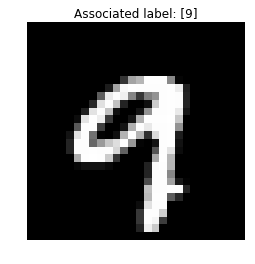

In [28]:
# Extract a single image
idx = 45621
digit_image = X_train_orig[idx]
plt.imshow(digit_image, cmap='gray')
plt.axis('off')
plt.title('Associated label: {}'.format(y_train_orig[idx]));

[Back to top](#Assignment-Contents)

---
<a id="q-features"></a>
## Question 7: Preprocessing the Digit Features

As a first step, preprocess the features in the arrays `X_train_orig` & `X_test_orig`.

+ Reshape the three-dimensional arrays into two-dimensional arrays.
 + Numpy arrays have a method for reshaping (or use the function `np.reshape`).
+ Rescale the integer values to be real values between 0 and 1.
 + Divide the arrays by 255.0 (the grayscale images have integer values between 0 & 255 by default).
+ Bind the rescaled & reshaped training & testing arrays to `X_train` & `X_test` respectively.

In [29]:
### GRADED
### QUESTION 7
### Rescale & reshape the feature arrays X_train_orig & X_test_orig as described above.
### Assign the results to X_train & X_test respectively.
### YOUR SOLUTION HERE:
X_train = np.reshape(X_train_orig, (60000, -1))/255.0
X_test  = np.reshape(X_test_orig, (10000, -1))/255.0
### For verification:
print('X_train: {}'.format(X_train.shape))
print('X_test:  {}'.format(X_test.shape))

X_train: (60000, 784)
X_test:  (10000, 784)


In [28]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
<a id="q-targets"></a>
## Question 8: Preprocessing the Targets

As a second step, preprocess the targets `y_train_orig` & `y_test_orig` by converting them to two-dimensional arrays with one-hot encoded rows (each corresponding to a particular categorical label).
+ You can use [`sklearn.preprocessing.OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to do the encoding. The result should should be a two-dimensional array of ones & zeros of shape `(60000,10)` for `y_train` and another of shape `(10000,100)` for `y_test`. Each row should be all zeros except for a single entry of one in the postion corresponding to the appropriate digit. For instance:
  ```python
>>> print(y_test_orig[:3])   #  labels *before* one-hot encoding
[[7]
 [2]
 [1]]
>>> print(y_test[:3])        # labels *after* one-hot-encoding
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
  ```
+ Bind the results to `y_train` and `y_test`.
+ Alternatively, the function `to_categorical` from `keras.utils` can be used for this task (but it does not provide the option for sparse representation as with the Scikit-Learn `OneHotEncoder`).

In [30]:
y_test_orig.shape

(10000, 1)

In [31]:
y_test_orig[:6]

array([[7],
       [2],
       [1],
       [0],
       [4],
       [1]], dtype=uint8)

In [32]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X = [['Male', 1], ['Female', 3], ['Female', 2]]
test = enc.fit_transform(X)
enc.get_feature_names()

array(['x0_Female', 'x0_Male', 'x1_1', 'x1_2', 'x1_3'], dtype=object)

In [33]:
test = enc.fit_transform(y_test_orig)

In [34]:
test.shape

(10000, 10)

In [35]:
### GRADED
### QUESTION 8
### Convert the target arrays y_train_orig & y_test_orig as described above.
### Assign the results to y_train & y_test respectively.
from sklearn.preprocessing import OneHotEncoder
### YOUR SOLUTION HERE:
enc = OneHotEncoder()
y_train = enc.fit_transform(y_train_orig)
y_test = enc.fit_transform(y_test_orig)
### For verification:
print('y_train: {}'.format(y_train.shape))
print('y_test:  {}'.format(y_test.shape))
print(y_test_orig[:3])
print(y_test[:3].todense()) # First three rows

y_train: (60000, 10)
y_test:  (10000, 10)
[[7]
 [2]
 [1]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [35]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### ScikitLearn `MLPClassifier`

Now the data is loaded and ready to be processed, we can feed it into a simple feed-forward neural network.
ScikitLearn has a straightforward implementation of a *Multi-layered Perceptron* (see the documemtation for the [`MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) class).  Here, we have control over aforementioned parameters like the activation function and the learning rate.

[Back to top](#Assignment-Contents)

---
<a id="q-MLP"></a>
### Question 9: Using the `MLPClassifier`

Your task here is to complete the code below to instantiate an `MLPClassifier`.
+ Set `activation='logistic'` to choose a logistic activation function.
+ Use `hidden_layer_sizes=(512,)` to create a single hidden layer with 512 units.
+ Set the `max_iter` parameter to `5` to limit the number of iterations (or *epochs*) of gradient descent.
+ Use `learning_rate='constant'` to keep the learning rate fixed and set `learning_rate_init` to `0.1`.

In [36]:
### GRADED
### QUESTION 9
### The MLPClassifier works as our other sklearn estimator classes
### Below you are to instantiate an MLPClassifier
### with a sigmoid ('logistic') activation function and learning rate
### of 0.01.
from sklearn.neural_network import MLPClassifier
### YOUR SOLUTION HERE:
mlp = MLPClassifier(activation = 'logistic', hidden_layer_sizes=(512,), max_iter = 5, learning_rate='constant', learning_rate_init = 0.1)


In [37]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Having instantiated the `MLPClassifier`, you can fit it to the training data and assess the accuracy in the usual way with Scikit-Learn estimator `fit` and `predict` (or `score`) methods. Notice, however, that this is rather slow (about 25 seconds on my laptop with 16GB RAM).

**Note**: If you experience timeouts, you may want to leave the next cell commented out (and the one that follows).

In [38]:
# %%time
# # LEAVE THIS CELL COMMENTED OUT THIS CELL IF YOU EXPERINCE TIMEOUTS!
# mlp.fit(X_train, y_train)   # Fitting to the training data is not so fast

In [39]:
# %%time
# LEAVE THIS CELL COMMENTED OUT THIS CELL IF YOU EXPERINCE TIMEOUTS!
# y_pred = mlp.predict(X_test)  # Prediction is much faster
# # Prediction is must faster
# accuracy_train = mlp.score(X_train, y_train)
# accuracy_test = mlp.score(X_test, y_test)
# print('Training accuracy: {:5.3f}'.format(accuracy_train))
# print('Testing  accuracy: {:5.3f}'.format(accuracy_test))

[Back to top](#Assignment-Contents)

---


## Introduction to Keras

<center>
    <a href="http://keras.io"><img src = "assets/keras.png" width = "50%" height = "50%" /></a>
</center>

Now that you have some familiarity the perceptron as a simple neural network and with the multi-layer perceptron in Scikit-Learn, you can use [Keras](http://keras.io) as a more practical framework to solve problems using neural networks. Keras is a library that provides a simple API for neural network algorithms on top of lower-level libraries like [Tensorflow](https://www.tensorflow.org/) or [Theano](https://github.com/Theano/Theano). Other high-level frameworks for neural networks ("deep learning") include [Chainer](https://chainer.org/) and [PyTorch](https://pytorch.org/).

[Back to top](#Assignment-Contents)

---
<a id="q-architecture"></a>
## Question 10: Setting up the Keras Architecture

You are now ready to instantiate a neural network model to solve the digits classification problem. This is referred to as specifying the *architecture* of the neural network.

+ To initialize the model, instantiate an object of the class `models.Sequential`. Use the default options.
+ Add a hidden layer using `network.add` with `layers.Dense`.
  + The first argument to `layers.Dense` is `512` (for 512 units).
  + Use the keyword argument `activation='relu'` to specify the ReLU activation function for this layer.
  + As this is the first layer instantiated, it is necessary to specify `input_shape` as a *tuple*.
+ Add a final output layer using `network.add` & `layers.Dense`.
  + This layer will have 10 units and `activation='softmax'` to specify the final output of the setup.

In [37]:
### GRADED
### QUESTION 10
### Create the neural network architecture using models.Sequential.
###   Bind the object to the identifier "network" and add two layers: a dense layer with
###   512 units with an activation function 'relu' and another dense layer, this time with
###  10 units and an activation function 'softmax'. Remember that the first layer requires
###  specification of the input dimensions. 
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_dim = 784))
network.add(layers.Dense(10, activation='softmax'))


Using TensorFlow backend.


In [38]:
X_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [42]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


To get `network` ready to fit to the training data, you have to first *compile* it. This involves specifying the optimizer (a choice of strategies to apply to solve for the network parameters), the loss function to minimize (categorical cross-entropy in this case as is common for multi-class classification problems), and a choice of metrics to track in the iterative process.

In [39]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

[Back to top](#Assignment-Contents)

---
<a id="q-fitting"></a>
## Question 11: Fitting the Neural Network to Training Data

You can fit the training data to the neural network using the `fit` method.
+ The `fit` method requires the feature array `X_train` and the target array `y_train` as inputs.
+ As optional keyword arguments, specify `epochs=5` (the number of sweeps through the data to make) and `batch_size=128` (the number of data points to use in each sweep through the data). This is in principle the same as the iterations of stochastic gradient descent (with a batch size of 1) made in the perceptron algorithm.
+ Bind the output of `network.fit` to the identifier `history`.

In [40]:
### GRADED
### QUESTION 11
### Apply the fit method to the object network to using the training data and the options
###   specified above. Assign the result to the identifier history.
### YOUR SOLUTION HERE:
history = network.fit(X_train, y_train, epochs = 5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.2599 - acc: 0.9238
Epoch 2/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.1039 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0687 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0493 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.0373 - acc: 0.9889


In [45]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
<a id="q-assessing"></a>
## Question 12: Assessing Neural Network Model Accuracy

Finally, you can assess the accuracy of the classification model using the testing data.
+ Apply the `evaluate` method to the object `network` with the testing data `X_test` & `y_test` as input.
+ The output will be a sequence of two values: the loss and the accuracy. Assign these values to `test_loss` and `test_acc` respectively.

In [41]:
### GRADED
### QUESTION 12
### Use the testing arrays X_test & y_test to compute the loss function & accuracy on the test data.
###   Assign the results to test_loss & test_acc respectively.
### YOUR SOLUTION HERE:
test_loss = network.evaluate(X_test, y_test)[0]
test_acc = network.evaluate(X_test, y_test)[1]
print('test_loss: {:9.4g}'.format(test_loss))
print('test_acc:  {:9.4g}'.format(test_acc))

10000/10000 [==============================] - 0s 35us/step
test_loss:   0.06741
test_acc:     0.9806


In [42]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Now you've worked through this, you've built your first neural network model from end-to-end in Keras!

[Back to top](#Assignment-Contents)

---

## Using Keras for Linear Regression: Boston Housing data

Using Keras in a regression setting is very similar to doing so for classification examples.  We will work through a basic implementation using the Boston Housing dataset from Keras.

In [44]:
d_file = np.load('data/boston.npz')
train_data = d_file['train_data']
test_data = d_file['test_data']
train_targets = d_file['train_targets']
test_targets = d_file['test_targets']

To begin, we need to standardize our data.   Recall that the standard score of a sample $x$ is calculated as:

$$z = \frac{(x - \mu)}{  s}$$


where $\mu$ is the mean of the training samples or zero if and $s$ is the standard deviation of the training samples.

[Back to top](#Assignment-Contents)

---
<a id="q-housing-features"></a>

## Question 13:Preprocessing the Housing Features

Your task here is to *standardize* the features of the housing data using the transformation above.
+ Given the two-dimensional array of features in `train_data`, replace each column by subtracting its mean and dividing by its standard deviation.
+ Assign the results to `scaled_train` and `scaled_test`.
+ Be sure to use the means & standard deviations from the *training* data to standardize the *testing* data. That is, the standardizing transformation can only rely on information known *a propri* from training; it cannot know statistical properties of future testing instances.

In [45]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [46]:
train_data.shape

(404, 13)

In [47]:
from numpy import *
norm = (train_data- mean(train_data, axis=0)) / std(train_data, axis=0)

In [48]:
norm[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [49]:
### GRADED
### QUESTION 13
### Assign scaled_train and scaled test as described above.
### YOUR SOLUTION HERE:
from numpy import *
scaled_train = (train_data- mean(train_data, axis=0)) / std(train_data, axis=0)
scaled_test = (test_data- mean(train_data, axis=0)) / std(train_data, axis=0)


In [54]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
<a id="q-housing-setup"></a>
## Question 14: Preparing the Neural Network for Regression

Below, you will write a basic function to setup the network using the following criteria:

- Uses a `Sequential` model.
- Contains two `Dense` layers with 32 units each and `relu` activation function.
- Contains a single `Dense` output layer with 1  unit.
- Compiles the network using:
 - `optimizer = 'rmsprop'`
 - `loss = 'mse'`
 - `metrics = ['mae']`

In [50]:
### GRADED
### QUESTION 14
### Complete the function build_regression() below.
### This function takes no arguments and returns a compiled Keras model
### object according to the criteria above.
def build_regression():
    '''
    Builds a Keras Sequential model with
    two Dense layers containing 32 units and 
    a single linear output layer.
    '''
    network = models.Sequential()
    network.add(layers.Dense(32, activation='relu', input_dim = 13))
    network.add(layers.Dense(32, activation='relu'))
    network.add(layers.Dense(1, ))
    network.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return network

In [56]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
<a id="q-housing-eval"></a>
## Question 15: Evaluating the Neural Network for Regression

Just as we did with the classification example, we can assess the accuracy of the model using the testing data.

+ Prepare a model using the function `build_regression` from the previous question.
+ Use the arrays `scaled_train` and `train_targets` to train the model using the `fit` method. Provide the keyword arguments `epochs=10`, and `batch_size=128` to tailor the number of training epochs and the number of random observations drawn in each batch within an epoch.
+ Finally, use the `evaluate` method with the testing data `scaled_test` & `test_targets` as input. The output will be a sequence of two values: the loss and the accuracy.
+ Assign these two values to `test_loss` and `test_acc` respectively.

In [51]:
### GRADED
### QUESTION 15
### Build and evaluate your Regression model.
### Save the evaluation loss to test_loss and accuracy
### to test_acc below.
### YOUR SOLUTION HERE:

model = build_regression()
model.fit(scaled_train, train_targets, epochs=10, batch_size=128)

test_loss = model.evaluate(scaled_test, test_targets)[0]
test_acc = model.evaluate(scaled_test, test_targets)[1]
print('test_loss: {:9.4g}'.format(test_loss))
print('test_acc:  {:9.4g}'.format(test_acc))

Epoch 1/10
404/404 [==============================] - 0s 293us/step - loss: 558.1595 - mean_absolute_error: 21.7858
Epoch 2/10
404/404 [==============================] - 0s 14us/step - loss: 540.7572 - mean_absolute_error: 21.3926
Epoch 3/10
404/404 [==============================] - 0s 11us/step - loss: 526.4425 - mean_absolute_error: 21.0703
Epoch 4/10
404/404 [==============================] - 0s 10us/step - loss: 512.6589 - mean_absolute_error: 20.7547
Epoch 5/10
404/404 [==============================] - 0s 10us/step - loss: 498.0163 - mean_absolute_error: 20.4206
Epoch 6/10
404/404 [==============================] - 0s 11us/step - loss: 482.5779 - mean_absolute_error: 20.0642
Epoch 7/10
404/404 [==============================] - 0s 12us/step - loss: 465.5264 - mean_absolute_error: 19.6660
Epoch 8/10
404/404 [==============================] - 0s 11us/step - loss: 448.2313 - mean_absolute_error: 19.2614
Epoch 9/10
404/404 [==============================] - 0s 11us/step - loss: 429.

In [52]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
# Constraint Satisfaction Problems and Backtracking


In the final portion of this assignment, you'll explore a few [Constraint Satisfaction Problems](https://en.wikipedia.org/wiki/Constraint_satisfaction_problem). From Wikipedia:
> Constraint satisfaction problems (CSPs) are mathematical questions defined as a set of objects whose state must satisfy a number of constraints or limitations. CSPs represent the entities in a problem as a homogeneous collection of finite constraints over variables, which is solved by constraint satisfaction methods. CSPs are the subject of intense research in both artificial intelligence and operations research, since the regularity in their formulation provides a common basis to analyze and solve problems of many seemingly unrelated families. CSPs often exhibit high complexity, requiring a combination of heuristics and combinatorial search methods to be solved in a reasonable time. The Boolean satisfiability problem (SAT), the satisfiability modulo theories (SMT) and answer set programming (ASP) can be roughly thought of as certain forms of the constraint satisfaction problem.

We will start with the [eight queens puzzle](https://en.wikipedia.org/wiki/Eight_queens_puzzle) or, more precisely, its generalization the $N$ queens puzzle.
Given an $N \times N$ chessboard, determine all the ways in which $N$ queens can be placed on the board so that no queen is threatened by another queen. Remember that queens can move an arbitrary number of spaces along horizontal rows, vertical columns, or diagonally connected squares on the chessboard. So, another way of stating the $N$ queens problem is to place $N$ queens on an $N\times N$ chessboard so that no two queens occupy the same row or column and so that no two queens lie along any diagonal line (i.e. at 45 degrees) of the board.

The $1$-Queens problem has a single, trivial solution. You can enumerate the cases for the $2$-Queens and $3$-Queens solutions to convince yourself that no solutions exist for these cases. For the $4$-Queens problem, here is one solution: 
<center>
    <img src = './assets/sol_4x4_b.png'>
</center>

To identify positions on the chess board, let the top left square be indexed by `(0,0)` with rows increasing downward and columns increasing to the right. For convenience sake, the positions of the $N$ queens on the board can be represented as a single list: the $k$th entry of the list represents the column location of the queen in row $k$.  For example, to represent the board above, use

```python
>>> board = [2, 0, 3, 1]
```

because the queens are positioned at coordinates `(0,2)`, `(1,0)`, `(2,3)`, & `(3,1)`.

In [59]:
#The board above and our representation
board = [2, 0, 3, 1]
print(board)

[2, 0, 3, 1]


To get started, you need to construct a function `is_nqueens_soln` to assess whether a given function is a valid solution of the $N$-Queens problem. Recall that an invalid board has two queens in the same row, the same column, or two queens on any diagonal line.

[Back to top](#Assignment-Contents)

---
<a id="q-queens-valid"></a>
## Question 16: Verifying a Valid *N*-Queens Chessboard

The task here is to complete the function `is_nqueens_soln` that accepts a list of length $N$ as input (the representation of a board as described above).
+ Given the list `board` of length $N$ with entries between $0$ and $N-1$, the board is assumed to have a queen at position `(k, board[k])` for `k` $=0,1,\dotsc,N-1$.
+ The function returns `False` if any horizontal line, vertical line, or diagonal line on the $N\times N$ chessboard contains more than one queen.
+ If the entries of `board` are all between $0$ and $N-1$ and the preceding condition fails, the function should return `True`.

In [53]:
### GRADED
### QUESTION 16
### Complete the function is_nqueens_soln as described above.
def is_nqueens_soln(board):
    '''Returns True or False according to whether board is a valid solution of the
    N-Queens problem (assuming board is a list of N column coordinates only).
    INPUT:
       board: a list of length N with column positions of queens in each row.
              (note: board should be a permutation of integers 0 through N-1).
    OUTPUT:
       True or False according to whether board is a valid solution of the N-Queens
       problem.
    EXAMPLE:
    >>> B1 = [1, 3, 0, 2]
    >>> is_nqueens_soln(B1)
    True
    >>> B2 = [2, 0, 3, 3]
    >>> is_nqueens_soln(B2)
    False
    '''
    
#     def is_attacked(row, col, queens):
#         return ((col in queens) or
#                any(abs(row-r)==abs(col-c) for r, c in enumerate(queens)))
#     N = len(board)
#     if N<2: return True
#     for row in range(N-1, 0, -1):
#         col = board[row]
#         if is_attacked(row, col, board[:row]):
#             return False
#     return True

###
### YOUR CODE HERE
###

    B_sorted = sorted(board)
    B_set = list(set(board))
    N = len(board)
    cols = range(N)
    if B_sorted != B_set:
        return False
    elif N==len(set(board[i]+i for i in cols))==len(set(board[i]-i for i in cols)):
        return True
    return False

In [55]:
B1 = [1, 3, 0, 2]
B2 = [2, 0, 3, 3]
B3 = [0, 1, 2, 3]
B4 = [2, 0, 3, 1]
B5 = [3, 0, 2, 4, 1]
is_nqueens_soln(B2)

False

In [63]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
You now have the pieces ready to solve the $N$-Queens problem, i.e., to construct the set of all solutions of the $N$-Queens for $N\ge 4$.

You can approach the problem using a general algorithm for solving CSPs called [*backtracking*](https://en.wikipedia.org/wiki/Backtracking). From Wikipedia:

> Backtracking is a general algorithm for finding all (or some) solutions to some computational problems, notably constraint satisfaction problems, that incrementally builds candidates to the solutions, and abandons a candidate ("backtracks") as soon as it determines that the candidate cannot possibly be completed to a valid solution.


The strategy is to enumerate incrementally a set of partial candidates that, in principle, could be completed in various ways to yield all the possible solutions to the given problem. The partial candidates can be conceptually represented as the nodes of a tree structure, the potential search tree. The backtracking algorithm traverses this search tree recursively in a depth-first order. At each node, the algorithm checks for a valid solution. If the current node cannot be completed to a valid solution, the whole subtree rooted at the current node is pruned. Otherwise, the algorithm recursively enumerates all subtrees of from the current node.

In the current context, you start with an empty board and the number of queens $N$ to be placed on an $N\times N$ board.

[Back to top](#Assignment-Contents)

---
<a id="q-queens-solving"></a>
## Question 17: Solving the *N*-Queens Problem by Backtracking

Your task here is to write a function to solve the $N$-Queens problem by backtracking.
+ The function `nqueens_solver` will accept a positive integer $N$ (you can assume that $N\ge4$).
+ Start with a list of known solutions containing an empty list (an empty board)
+ Loop over the rows from $0$ to $N-1$:
  + Initialize an empty list to accumulate new solutions
  + For each column index $k$ from $0$ to $N-1$:
    + For each solution list currrently in the list of known solutions:    
      + Append the index $k$ to the end of the current solution
      + Determine if the modified solution is valid; if so, add it to the list of new solutions
  + After looping through all the solutions & all the columns k, overwrite the list of known solutions with the new list of solutions accumulated.
+ After looping through all the rows, return the list of solutions accumulated.
+ Do not worry about the specific sequence in which the list of solutions is returned.

In [77]:
from itertools import permutations

In [60]:
### GRADED
### QUESTION 17
### Complete the function nqueens_solver() below.
### This function takes in a value N (size of the board) and uses 
### backtracking to build a list of all the solutions.
from itertools import permutations
def nqueens_solver(N):
    '''Backtracking solver for N-Queens problem.
    INPUT:
      N: positive integer >= 4 (size of chess board)
    OUTPUT:
      solutions: list of lists of length N (permutations of 0..N-1)
    EXAMPLE:
    >>> for sol in nqueens_solver(4): print(sol)
    [2, 0, 3, 1]
    [1, 3, 0, 2]
    >>> for sol in nqueens_solver(5): print(sol) # Order not important
    [3, 1, 4, 2, 0]
    [2, 4, 1, 3, 0]
    [4, 2, 0, 3, 1]
    [3, 0, 2, 4, 1]
    [4, 1, 3, 0, 2]
    [0, 3, 1, 4, 2]
    [1, 4, 2, 0, 3]
    [0, 2, 4, 1, 3]
    [2, 0, 3, 1, 4]
    [1, 3, 0, 2, 4]
    '''
###
### YOUR CODE HERE
###
    # Start with a list of known solutions containing an empty list (an empty board)
    sol = []
    cols = range(N)
    for combo in permutations(cols):
        if N==len(set(combo[i]+i for i in cols))==len(set(combo[i]-i for i in cols)):
            sol.append(list(combo))
    return sol
    # Loop over the rows from 0 to N-1:
    #     Initialize an empty list to accumulate new solutions
    #     For each column index k from 0 to N-1:
    #       For each solution list currrently in the list of known solutions:    
    #           Append the index k to the end of the current solution
    #           Determine if the modified solution is valid;
    #               if so, add it to the list of new solutions
    #     After looping through all the solutions & all the columns k, overwrite
    #     the list of known solutions with the new list of solutions accumulated.
    # After looping through all the rows, return the list of solutions accumulated.

In [62]:
for sol in nqueens_solver(5): print(sol)

[0, 2, 4, 1, 3]
[0, 3, 1, 4, 2]
[1, 3, 0, 2, 4]
[1, 4, 2, 0, 3]
[2, 0, 3, 1, 4]
[2, 4, 1, 3, 0]
[3, 0, 2, 4, 1]
[3, 1, 4, 2, 0]
[4, 1, 3, 0, 2]
[4, 2, 0, 3, 1]


In [67]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---

An example of a more useful problem one can solve using backtracking is the *flight itinerary problem*. In this problem, you are given a set of tuples of the form *(origin, destination)* where each ordinate in the tuple is an airport code. A starting airport is specifed, but the set of tuples is otherwise not provided in any particular sequence. The goal is to use the list of tuples (flights) provided to recover the sequence of airports visited in sequence making sure to exhaust every tuple in the set provided. Of course, this can be considered a graph teraversal problem where the nodes/vertices are the airports and the edges are the connecting flights.

For example, given the following set of flights
```
    ORD ➔ EWR
    YVR ➔ SFO
    SFO ➔ ORD
    YUL ➔ YVR

```

and the starting airport `YUL`, you should recover the sequence `YUL ➔ YVR ➔ SFO ➔ ORD ➔ EWR`. In Python, you'll represent the flights as tuples of strings and the final sequence as a single list of strings:
```python
>>> flights = [('ORD','EWR'), ('YVR','SFO'), ('SFO','ORD'), ('YUL','YVR')]
>>> # Eventual itinerary to arrive at...
>>> itinerary = ['YUL', 'YVR', 'SFO', 'ORD', 'EWR']
```
Much like the approach to the $N$-Queens puzzle, you will start with a given itinerary, move through the list and test for valid connections.  If it is, we will continue down the list until we reach a terminal state.  If we reach an invalid move,  we will `.pop()` the move and continue on.  

[Back to top](#Assignment-Contents)

---
<a id="q-flights-small"></a>
## Question 18: Determining a Flight Itinerary

Your task here is to construct a function `get_itinerary` that returns a flight itinerary as described above from a sequence of connecting flights.
+ The function accepts two inputs: `flights`, a list of tuples of strings of the form `(origin, destination)` (airport codes) and `itinerary`, a list of strings (airport codes) as input.
+ The result returned should be a list of strings like `itinerary` describing a path that traverses all the nodes in `flights`.
+ If no such path exists, it should return the Python value `None`.

In [258]:
def get_itinerary(flights, itinerary):
    '''Returns a list of airports (vertices) comprising a traversal of the edges
    listed in the input flights.
    INPUT:
      flight: list of tuples of the form (origin, destination) (i.e., airports)
      itinerary: list of destinations (airports)
    OUTPUT:
      list of airports traversing all edges in flights or None
    EXAMPLE:
    >>> flights = [('ORD','EWR'), ('YVR','SFO'), ('SFO','ORD'), ('YUL','YVR')]
    >>> print(get_itinerary(flights, ['YUL']))
    ['YUL', 'YVR', 'SFO', 'ORD', 'EWR']
    >>> print(get_itinerary(flights, ['SFO']))
    None
    '''
###
### YOUR CODE HERE
###

    stops = [item[1] for item in flights]
    destinations = [item[0] for item in flights]

    while len(destinations) > 0:
        item = itinerary[-1]
        if item in destinations:
            pos = destinations.index(item)
            itinerary.append(stops[pos])
            destinations.remove(item)
            stops.remove(stops[pos])
        else:
            destinations = []
            itinerary = None
        
    return itinerary

    # If flights is empty, return itinerary (you're done)
    # Extract the previous stop from the itinerary
    # Loop over the list of flights:
        # Copy flights excluding current one to mark it as used
        # Append the destination (second ordinate) from tuple to itinerary
        # When the origin (1st ordinate) matches the previous stop, return
        #    the result of a recursive call to get_itinerary using the current
        #    itinerary and the copy of flights that excludes the current one.)
        # Pop the last entry from the itinerary
    # Return None if the loop terminates without returning


In [261]:
flights = [('ORD','EWR'), ('YVR','SFO'), ('SFO','ORD'), ('YUL','YVR')]
print(get_itinerary(flights, ['YUL', 'YVR']))

None


In [63]:
flights = [('ORD','EWR'), ('YVR','SFO'), ('SFO','ORD'), ('YUL','YVR')]
city = ['YUL']

In [67]:
def test(fligts, city):
    itin = city[0]
    stops = [item[1] for item in flights]
    destinations = [item[0] for item in flights]
        # If flights is empty, return itinerary (you're done)
    for item in destinations:
        if item == city:
            pos = destinations.index(item)
            city = stops[pos]
            destinations.pop(item)
            itin.append(city)
        else:
            return None
    return itin
    # Extract the previous stop from the itinerary
    # Loop over the list of flights:
        # Copy flights excluding current one to mark it as used
        # Append the destination (second ordinate) from tuple to itinerary
        # When the origin (1st ordinate) matches the previous stop, return
        #    the result of a recursive call to get_itinerary using the current
        #    itinerary and the copy of flights that excludes the current one.)
        # Pop the last entry from the itinerary
    # Return None if the loop terminates without returning

    >>> flights = [('ORD','EWR'), ('YVR','SFO'), ('SFO','ORD'), ('YUL','YVR')]
    >>> print(get_itinerary(flights, ['YUL']))
    ['YUL', 'YVR', 'SFO', 'ORD', 'EWR']

In [253]:
flights = [('ORD','EWR'), ('YVR','SFO'), ('SFO','ORD'), ('YUL','YVR')]
itinerary = ['SFO']
itin = [itinerary[0]]
stops = [item[1] for item in flights]
destinations = [item[0] for item in flights]
stops, destinations

(['EWR', 'SFO', 'ORD', 'YVR'], ['ORD', 'YVR', 'SFO', 'YUL'])

In [241]:
itinerary[-1], flights

('EWR', [])

In [250]:
while len(destinations) > 0:
    item = itinerary[-1]
    if item in destinations:
        print(item)
        pos = destinations.index(item)
        itinerary.append(stops[pos])
        destinations.remove(item)
        stops.remove(stops[pos])
        print(stops)
        print(destinations)
    else:
        destinations = []
        itinerary = None
else:
    print('over')
    print(itinerary)

SFO
['EWR', 'SFO', 'YVR']
['ORD', 'YVR', 'YUL']
ORD
['SFO', 'YVR']
['YVR', 'YUL']
over
None


In [240]:
N = len(flights)
count = 0
while len(flights) > 0:
    for item in flights:
        if item[0] == itinerary[-1]:
            print(item)
            itinerary.append(item[1])
            flights.remove(item)
            count += 1
            destinations.remove(item[0])
            print(flights)
            print(destinations)
            
else:
    print('over')
    print(itinerary)

('YUL', 'YVR')
[('ORD', 'EWR'), ('YVR', 'SFO'), ('SFO', 'ORD')]
['ORD', 'YVR', 'SFO']
('YVR', 'SFO')
[('ORD', 'EWR'), ('SFO', 'ORD')]
['ORD', 'SFO']
('SFO', 'ORD')
[('ORD', 'EWR')]
['ORD']
('ORD', 'EWR')
[]
[]
over
['YUL', 'YVR', 'SFO', 'ORD', 'EWR']


In [124]:
city = itinerary[0]
while len(destinations) > 0:
    print(len(destinations))
    pos = destinations.index(city)
    destinations.remove(city)
    print(pos)
    city = stops[pos]
    print(city)
#     destinations.remove(city)
#     stops.remove(city)
    print(destinations)
    itin.append(city)

4
3
YVR
['ORD', 'YVR', 'SFO']
3
1
SFO
['ORD', 'SFO']
2
1
SFO
['ORD']
1


ValueError: 'SFO' is not in list

['YUL']

In [70]:
def test(flights, city)
    final =[]
    stop = city.pop()
    final.append(stop)
#     if count != len(flights) + 1 and len(city) > 0 and len(flights) != 0:
#         stop = city.pop()
#         final.append(stop)
#         count +=1
    for flight in flights:
        if flight[0] == stop:
            stop = flight[1]
            final.append(stop)
                print(stop)
                count +=1
    else:
        return final
            final.append(stop)
            flights.pop(flight)
    return(final)
        
                
    seq = [city]
    for item in flights:
        if item[0] == city[0]:
            seq.append(item[1])
            item[1] = city
        else:
            return None
    return seq
            
            

In [71]:
test(flights, ['YUL'])

TypeError: 'list' object is not callable

In [ ]:
oki

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)

---
## References

+ [*Artificial Neural Network* ](https://en.wikipedia.org/wiki/Artificial_neural_network) (Wikipedia)
+ [Neural Networks & Deep Learning](http://neuralnetworksanddeeplearning.com/) by Michael Nielsen
+ [Keras documentation](https://keras.io)
+ [*Constraint Satisfaction Problems*](https://en.wikipedia.org/wiki/Constraint_satisfaction_problem) (Wikipedia)
+ [`python-constraint`](https://labix.org/python-constraint)